In [1]:
from nba_api.stats import endpoints, static
from nba_api.stats.static import players, teams
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn import linear_model

In [2]:
data = endpoints.leagueleaders.LeagueLeaders()

df = data.league_leaders.get_data_frame()

In [3]:
df.head()

,PLAYER_ID,RANK,PLAYER,TEAM_ID,TEAM,GP,MIN,FGM,FGA,FG_PCT,...,REB,AST,STL,BLK,TOV,PF,PTS,EFF,AST_TOV,STL_TOV
0,1628369,1,Jayson Tatum,1610612738,BOS,74,2732,727,1559,0.466,...,649,342,78,51,213,160,2225,2209,1.61,0.37
1,203954,2,Joel Embiid,1610612755,PHI,66,2284,728,1328,0.548,...,670,274,66,112,226,205,2183,2369,1.21,0.29
2,1629029,3,Luka Doncic,1610612742,DAL,66,2391,719,1449,0.496,...,569,529,90,33,236,166,2138,2214,2.24,0.38
3,1628983,4,Shai Gilgeous-Alexander,1610612760,OKC,68,2416,704,1381,0.510,...,329,371,112,65,192,192,2135,2073,1.93,0.58
4,203507,5,Giannis Antetokounmpo,1610612749,MIL,63,2024,707,1278,0.553,...,742,359,52,51,246,197,1959,2072,1.46,0.21


In [4]:
x, y = df.FGA/df.GP, df.PTS/df.GP

x = np.array(x).reshape(-1, 1)
y = np.array(y).reshape(-1, 1)

model = linear_model.LinearRegression()
model.fit(x, y)

LinearRegression()

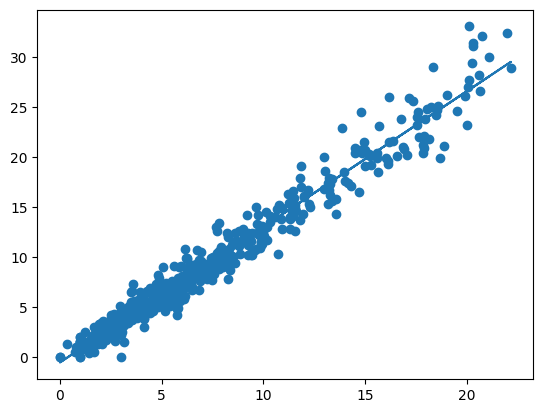

In [5]:
predicted_y = model.predict(x)

plt.scatter(x, y)
plt.plot(x, predicted_y)

In [6]:
player_dict = players.get_players()

In [7]:
bron = [player for player in player_dict if player['full_name'] == 'LeBron James'][0]
bron_id = bron['id']

In [8]:
team_dict = teams.get_teams()
gsw = [team for team in team_dict if team['full_name'] =='Golden State Warriors'][0]
gsw_id = gsw['id']

In [9]:
gamelog_bron = endpoints.playergamelog.PlayerGameLog(player_id=f'{bron_id}', season = '2018')

df_bron_games_2018 = gamelog_bron.get_data_frames()

In [10]:
from nba_api.stats.library.parameters import SeasonAll

gamelog_bron_all = endpoints.playergamelog.PlayerGameLog(player_id=f'{bron_id}', season = SeasonAll.all)

df_bron_games_all = gamelog_bron_all.get_data_frames()

In [11]:
df_bron_games_all[0].head()

,SEASON_ID,Player_ID,Game_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,...,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE
0,22022,2544,0022201228,"APR 09, 2023",LAL vs. UTA,W,33,13,25,0.520,...,5,6,6,1,1,2,0,36,20,1
1,22022,2544,0022201212,"APR 07, 2023",LAL vs. PHX,W,29,6,19,0.316,...,6,6,6,0,0,5,1,16,11,1
2,22022,2544,0022201196,"APR 05, 2023",LAL @ LAC,L,35,13,20,0.650,...,8,8,7,1,1,6,0,33,-10,1
3,22022,2544,0022201186,"APR 04, 2023",LAL @ UTA,W,38,14,27,0.519,...,5,5,6,1,1,5,2,37,-7,1
4,22022,2544,0022201171,"APR 02, 2023",LAL @ HOU,W,29,8,18,0.444,...,8,10,11,0,1,1,1,18,23,1
